In [1]:
# Task
## Image Classification
### Understand the Images
### Size
### Create Collections
### Label
### Save in Pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import skimage.io
import skimage.feature
import skimage.transform

import os
from glob import glob
import re

%matplotlib inline

In [3]:
# read all the folders in a list
folder = os.listdir('data')
print(folder)

['BearHead', 'CatHead', 'ChickenHead', 'CowHead', 'DeerHead', 'DogHead', 'DuckHead', 'EagleHead', 'ElephantHead', 'HumanHead', 'LionHead', 'MonkeyHead', 'MouseHead', 'Natural', 'PandaHead', 'PigeonHead', 'RabbitHead', 'SheepHead', 'TigerHead', 'WolfHead']


In [22]:
all_path =[]
for f in folder:
    all_path += glob('./data/{}/*.jpg'.format(f))

In [26]:
all_path

['./data/BearHead\\bearfrontal0001.jpg',
 './data/BearHead\\bearfrontal0002.jpg',
 './data/BearHead\\bearfrontal0003.jpg',
 './data/BearHead\\bearfrontal0004.jpg',
 './data/BearHead\\bearfrontal0005.jpg',
 './data/BearHead\\bearfrontal0006.jpg',
 './data/BearHead\\bearfrontal0007.jpg',
 './data/BearHead\\bearfrontal0008.jpg',
 './data/BearHead\\bearfrontal0009.jpg',
 './data/BearHead\\bearfrontal0010.jpg',
 './data/BearHead\\bearfrontal0011.jpg',
 './data/BearHead\\bearfrontal0012.jpg',
 './data/BearHead\\bearfrontal0013.jpg',
 './data/BearHead\\bearfrontal0014.jpg',
 './data/BearHead\\bearfrontal0015.jpg',
 './data/BearHead\\bearfrontal0016.jpg',
 './data/BearHead\\bearfrontal0017.jpg',
 './data/BearHead\\bearfrontal0018.jpg',
 './data/BearHead\\bearfrontal0019.jpg',
 './data/BearHead\\bearfrontal0020.jpg',
 './data/BearHead\\bearfrontal0021.jpg',
 './data/BearHead\\bearfrontal0022.jpg',
 './data/BearHead\\bearfrontal0023.jpg',
 './data/BearHead\\bearfrontal0024.jpg',
 './data/BearHea

In [27]:
# read all image and label
img_all = skimage.io.ImageCollection(all_path)

In [28]:
len(img_all)

2057

In [30]:
img_all.files

['./data/BearHead\\bearfrontal0001.jpg',
 './data/BearHead\\bearfrontal0002.jpg',
 './data/BearHead\\bearfrontal0003.jpg',
 './data/BearHead\\bearfrontal0004.jpg',
 './data/BearHead\\bearfrontal0005.jpg',
 './data/BearHead\\bearfrontal0006.jpg',
 './data/BearHead\\bearfrontal0007.jpg',
 './data/BearHead\\bearfrontal0008.jpg',
 './data/BearHead\\bearfrontal0009.jpg',
 './data/BearHead\\bearfrontal0010.jpg',
 './data/BearHead\\bearfrontal0011.jpg',
 './data/BearHead\\bearfrontal0012.jpg',
 './data/BearHead\\bearfrontal0013.jpg',
 './data/BearHead\\bearfrontal0014.jpg',
 './data/BearHead\\bearfrontal0015.jpg',
 './data/BearHead\\bearfrontal0016.jpg',
 './data/BearHead\\bearfrontal0017.jpg',
 './data/BearHead\\bearfrontal0018.jpg',
 './data/BearHead\\bearfrontal0019.jpg',
 './data/BearHead\\bearfrontal0020.jpg',
 './data/BearHead\\bearfrontal0021.jpg',
 './data/BearHead\\bearfrontal0022.jpg',
 './data/BearHead\\bearfrontal0023.jpg',
 './data/BearHead\\bearfrontal0024.jpg',
 './data/BearHea

In [33]:
# Labeling
# extract text folder
def extract_label(text):
    try:
        label = re.search(r'./data/(.*?)Head\\',text).group(1)
    except:
        label = re.search(r'./data/(.*?)\\',text).group(1)
    
    return label.lower()

In [34]:
labels = list(map(extract_label, img_all.files))

In [35]:
len(labels)

2057

In [39]:
def buffer(io):
    return io
img_all_arrs = np.array(list(map(buffer, img_all)))

In [40]:
img_all_arrs.shape

(2057, 80, 80, 3)

In [42]:
data = dict()

data['description'] = 'There are 20 classes and 2057 images are there. All the images are 80 x 80 (rgb)'
data['data'] = img_all_arrs
data['target'] = labels
data['labels'] = set(labels)

In [43]:
data

{'description': 'There are 20 classes and 2057 images are there. All the images are 80 x 80 (rgb)',
 'data': array([[[[196, 214, 188],
          [196, 214, 188],
          [196, 214, 188],
          ...,
          [ 81,  76,  80],
          [ 81,  76,  80],
          [ 69,  64,  68]],
 
         [[196, 214, 188],
          [196, 214, 188],
          [196, 215, 187],
          ...,
          [ 82,  77,  81],
          [ 83,  78,  82],
          [ 77,  72,  76]],
 
         [[193, 213, 185],
          [194, 214, 186],
          [194, 214, 186],
          ...,
          [ 82,  77,  81],
          [ 81,  76,  80],
          [ 78,  73,  77]],
 
         ...,
 
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [ 70,  65,  69],
          [ 65,  60,  64],
          [ 62,  57,  63]],
 
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [ 66,  61,  65],
          [ 62,  57,  61],
      

In [44]:
# save the file in pickle
import pickle
import collections

In [45]:
pickle.dump(data, open('data_animals_head_20.pickle','wb'))

In [48]:
###

In [49]:
count_values = collections.Counter(data['target'])
count_values

Counter({'bear': 101,
         'cat': 159,
         'chicken': 100,
         'cow': 103,
         'deer': 103,
         'dog': 132,
         'duck': 103,
         'eagle': 100,
         'elephant': 100,
         'human': 100,
         'lion': 102,
         'monkey': 100,
         'mouse': 100,
         'natural': 8,
         'panda': 118,
         'pigeon': 115,
         'rabbit': 100,
         'sheep': 100,
         'tiger': 113,
         'wolf': 100})

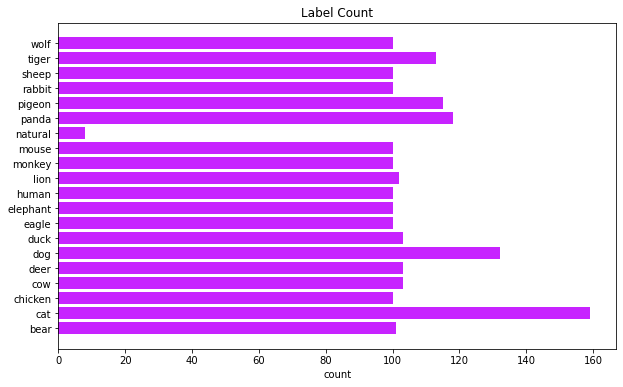

In [54]:
y_axis = list(count_values.keys())
values = count_values.values()
plt.figure(figsize = (10,6))
plt.barh(y_axis,values, color = '#C723FF')
plt.xlabel('count')
plt.title('Label Count')
plt.show()

In [65]:
data['data'].shape

(2057, 80, 80, 3)

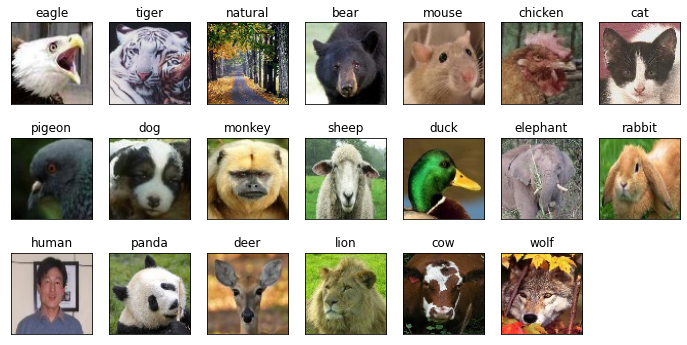

In [67]:
plt.figure(figsize=(12,6))
for i,c in enumerate(data['labels']):
    index = data['target'].index(c)
    img = data['data'][index]
    
    plt.subplot(3,7,i+1)
    plt.imshow(img)
    plt.xticks([]),plt.yticks([])
    plt.title(c)

plt.show()